In [5]:
import tensorflow as tf
import numpy as np
import pickle
np.random.seed(7)

In [6]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\input_layer_4_6_11_3.pickle','rb') as file:
    input_data = pickle.load(file)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation,:]
print(input_data.shape)
x_train = input_data[:100000, :]
x_test = input_data[100000:105000, :]


(105000, 24)


In [7]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\output_layer_4_6_11_3.pickle','rb') as file:
    output_data = pickle.load(file)
output_data = np.transpose(output_data)
output_data = output_data[permutation,:]
y_train = output_data[:100000, :]
y_test = output_data[100000:105000, :]
print(output_data.shape)

(105000, 12)


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(130, input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(130, activation = 'relu'),
    tf.keras.layers.Dense(130, activation = 'relu'),
    tf.keras.layers.Dense(130, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 100, verbose = 2, validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/100
100000/100000 - 2s - loss: 0.3104 - accuracy: 0.8719 - val_loss: 0.2730 - val_accuracy: 0.8876
Epoch 2/100
100000/100000 - 1s - loss: 0.2607 - accuracy: 0.8902 - val_loss: 0.2551 - val_accuracy: 0.8924
Epoch 3/100
100000/100000 - 1s - loss: 0.2406 - accuracy: 0.8967 - val_loss: 0.2318 - val_accuracy: 0.9015
Epoch 4/100
100000/100000 - 1s - loss: 0.2169 - accuracy: 0.9074 - val_loss: 0.2104 - val_accuracy: 0.9113
Epoch 5/100
100000/100000 - 1s - loss: 0.1960 - accuracy: 0.9159 - val_loss: 0.1938 - val_accuracy: 0.9173
Epoch 6/100
100000/100000 - 1s - loss: 0.1794 - accuracy: 0.9213 - val_loss: 0.1759 - val_accuracy: 0.9219
Epoch 7/100
100000/100000 - 1s - loss: 0.1665 - accuracy: 0.9254 - val_loss: 0.1659 - val_accuracy: 0.9250
Epoch 8/100
100000/100000 - 1s - loss: 0.1538 - accuracy: 0.9298 - val_loss: 0.1595 - val_accuracy: 0.9268
Epoch 9/100
100000/100000 - 1s - loss: 0.1442 - accuracy: 0.9338 - val_loss: 0.1484 - val_accu

Epoch 77/100
100000/100000 - 1s - loss: 0.0228 - accuracy: 0.9916 - val_loss: 0.0484 - val_accuracy: 0.9844
Epoch 78/100
100000/100000 - 1s - loss: 0.0203 - accuracy: 0.9924 - val_loss: 0.0455 - val_accuracy: 0.9857
Epoch 79/100
100000/100000 - 1s - loss: 0.0212 - accuracy: 0.9922 - val_loss: 0.0527 - val_accuracy: 0.9832
Epoch 80/100
100000/100000 - 1s - loss: 0.0237 - accuracy: 0.9914 - val_loss: 0.0512 - val_accuracy: 0.9845
Epoch 81/100
100000/100000 - 1s - loss: 0.0208 - accuracy: 0.9923 - val_loss: 0.0525 - val_accuracy: 0.9843
Epoch 82/100
100000/100000 - 1s - loss: 0.0207 - accuracy: 0.9924 - val_loss: 0.0466 - val_accuracy: 0.9864
Epoch 83/100
100000/100000 - 1s - loss: 0.0201 - accuracy: 0.9928 - val_loss: 0.0499 - val_accuracy: 0.9847
Epoch 84/100
100000/100000 - 1s - loss: 0.0187 - accuracy: 0.9932 - val_loss: 0.0520 - val_accuracy: 0.9842
Epoch 85/100
100000/100000 - 1s - loss: 0.0206 - accuracy: 0.9925 - val_loss: 0.0536 - val_accuracy: 0.9841
Epoch 86/100
100000/100000 -

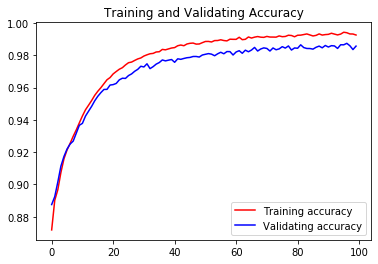

In [10]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [11]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Look_ahead_N\\Look_ahead_N_4_6_11_3_model.h5')